In [89]:
import pandas as pd
import gstlearn as gl
import gstlearn.plot as gp
import gstlearn.document as gdoc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
verbose  = True
graphics = True
gl.OptCst.define(gl.ECst.NTCOL,6)
gdoc.setNoScroll()

data = 'data/pdh_data.parquet'

<IPython.core.display.Javascript object>

In [90]:
data2 = 'data/pfas_france_pretraite.parquet'
df2 = pd.read_parquet(data2)

In [91]:
df2.head()

,category,lat,lon,country,dataset_id,pfas_values,unit,pfas_sum,matrix,date,year
342134,Known,41.458298,9.145714,France,29,"[{""cas_id"": ""375-22-4"", ""unit"": ""ng/l"", ""subst...",ng/l,0.0,Surface water,2018-03-15,2018.0
325566,Known,41.576726,9.291149,France,29,"[{""cas_id"": ""376-06-7"", ""unit"": ""ng/l"", ""subst...",ng/l,0.0,Surface water,2014-01-15,2014.0
325433,Known,41.655659,8.981629,France,29,"[{""cas_id"": ""375-22-4"", ""unit"": ""ng/l"", ""subst...",ng/l,0.0,Surface water,2016-01-14,2016.0
342128,Known,41.667497,9.206354,France,29,"[{""cas_id"": ""307-24-4"", ""unit"": ""ng/l"", ""subst...",ng/l,9.0,Surface water,2020-06-10,2020.0
325521,Known,41.718255,9.303876,France,29,"[{""cas_id"": ""376-06-7"", ""unit"": ""ng/l"", ""subst...",ng/l,0.0,Surface water,2014-01-13,2014.0


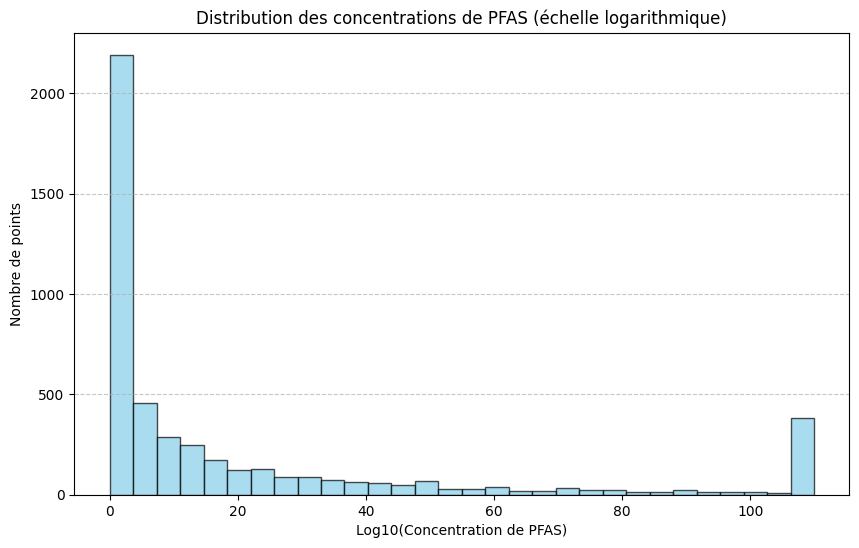

In [92]:
# Appliquer une transformation logarithmique sur les valeurs
log_values = df2['pfas_sum']

# Créer l'histogramme avec une échelle logarithmique
plt.figure(figsize=(10, 6))
plt.hist(log_values, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Ajouter des labels et un titre
plt.xlabel('Log10(Concentration de PFAS)')
plt.ylabel('Nombre de points')
plt.title('Distribution des concentrations de PFAS (échelle logarithmique)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Afficher l'histogramme
plt.show()

In [93]:
df = pd.read_parquet(data)
df

,category,lat,lon,name,city,country,type,sector,source_type,source_text,source_url,dataset_id,dataset_name,pfas_values,unit,pfas_sum,details,matrix,date,year
0,Known PFAS user,52.504114,-0.682637,3F,Corby,United Kingdom,Industrial site,None,Company website,3F,https://www.3fff.co.uk/,0,Known_PFAS_User_List,[],ng/l,NaN,{},None,None,NaN
1,Known PFAS user,50.871865,6.034522,3M,Kerkrade,Netherlands,Industrial site,Manufacture of rubber and plastic products,Company website,3M,https://www.3mdeutschland.de/3M/de_DE/presse-d...,0,Known_PFAS_User_List,[],ng/l,NaN,"{""maps_link"": ""https://goo.gl/maps/z5dYoRaZxkK...",None,None,NaN
2,Known PFAS user,50.223409,8.765597,3P - Performance Plastics Products,Karben,Germany,Industrial site,Manufacture of rubber and plastic products,Company website,3P,https://www.3pcorporate.com//wp-content/upload...,0,Known_PFAS_User_List,[],ng/l,NaN,{},None,None,NaN
3,Known PFAS user,47.858601,5.347156,3P Performance Plastics Products,Langres,France,Industrial site,Manufacture of rubber and plastic products,Company website,3P,https://www.haute-marne.gouv.fr/content/downlo...,0,Known_PFAS_User_List,[],ng/l,NaN,{},None,None,NaN
4,Known PFAS user,39.471674,-0.538828,3P Productos Plásticos Performantes,Valencia,Spain,Industrial site,Manufacture of rubber and plastic products,Company website,3P,https://www.3pcorporate.com//wp-content/upload...,0,Known_PFAS_User_List,[],ng/l,NaN,{},None,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478235,Known,NaN,NaN,Tap water sampling,Montpellier,France,Sampling location,None,Own sampling campaign,Enquête Radio France 19/09/2024,https://www.francetvinfo.fr/enquetes-franceinf...,131,Radio France - Drinking water,"[{""cas_id"": ""13252-13-6"", ""unit"": ""ng/l"", ""sub...",ng/l,0.0,"{""Denomination"": ""FB HERAULT"", ""Date_heure_Pre...",Drinking water,2024-04-25,2024.0
478236,Known,NaN,NaN,Tap water sampling,Fenay,France,Sampling location,None,Own sampling campaign,Enquête Radio France 19/09/2024,https://www.francetvinfo.fr/enquetes-franceinf...,131,Radio France - Drinking water,"[{""cas_id"": ""13252-13-6"", ""unit"": ""ng/l"", ""sub...",ng/l,0.0,"{""Denomination"": ""FB BOURGOGNE"", ""Date_heure_P...",Drinking water,2024-04-29,2024.0
478237,Known,NaN,NaN,Tap water sampling,Saint-Jean-de-Losne,France,Sampling location,None,Own sampling campaign,Enquête Radio France 19/09/2024,https://www.francetvinfo.fr/enquetes-franceinf...,131,Radio France - Drinking water,"[{""cas_id"": ""355-46-4"", ""unit"": ""ng/l"", ""subst...",ng/l,25.5,"{""Denomination"": ""FB BOURGOGNE"", ""Date_heure_P...",Drinking water,2024-05-07,2024.0
478238,Known,NaN,NaN,Tap water sampling,Cazaux La Teste de Buche,France,Sampling location,None,Own sampling campaign,Enquête Radio France 19/09/2024,https://www.francetvinfo.fr/enquetes-franceinf...,131,Radio France - Drinking water,"[{""cas_id"": ""13252-13-6"", ""unit"": ""ng/l"", ""sub...",ng/l,0.0,"{""Denomination"": ""FB GIRONDE"", ""Date_heure_Pre...",Drinking water,2024-05-01,2024.0


In [94]:

df.category.unique()

array(['Known PFAS user', 'Presumptive', 'Known'], dtype=object)

In [95]:
df_num = df[df.category=='Known']
df_num = df_num.drop(['name','city','type','sector','source_type','source_text','source_url','dataset_name','details'],axis=1)
df_num_surf = df_num[df_num.matrix=='Surface water']
df_num_surf

,category,lat,lon,country,dataset_id,pfas_values,unit,pfas_sum,matrix,date,year
12991,Known,50.808932,3.352552,Belgium,10,"[{""cas_id"": ""335-67-1"", ""unit"": ""ng/l"", ""subst...",ng/l,130.00,Surface water,None,2018.0
12992,Known,51.016507,4.088303,Belgium,10,"[{""cas_id"": ""335-67-1"", ""unit"": ""ng/l"", ""subst...",ng/l,200.00,Surface water,None,2017.0
12993,Known,51.042282,3.548967,Belgium,10,"[{""cas_id"": ""335-67-1"", ""unit"": ""ng/l"", ""subst...",ng/l,42400.00,Surface water,None,2016.0
12994,Known,51.771554,6.605953,Germany,10,"[{""cas_id"": ""335-67-1"", ""unit"": ""ng/l"", ""subst...",ng/l,50.00,Surface water,None,2017.0
12995,Known,49.590101,7.603395,Germany,10,"[{""cas_id"": ""307-24-4"", ""unit"": ""ng/l"", ""subst...",ng/l,580.00,Surface water,None,2018.0
...,...,...,...,...,...,...,...,...,...,...,...
476305,Known,51.796320,0.190570,United Kingdom,129,"[{""cas_id"": ""335-67-1"", ""unit"": ""ng/l"", ""subst...",ng/l,35.18,Surface water,2023-04-28,2023.0
476306,Known,51.796320,0.190570,United Kingdom,129,"[{""cas_id"": ""335-24-0"", ""unit"": ""ng/l"", ""subst...",ng/l,120.50,Surface water,2023-08-09,2023.0
476307,Known,51.796320,0.190570,United Kingdom,129,"[{""cas_id"": ""2706-90-3"", ""unit"": ""ng/l"", ""subs...",ng/l,40.81,Surface water,2023-12-01,2023.0
476308,Known,51.658000,-1.422160,United Kingdom,129,"[{""cas_id"": ""375-22-4"", ""unit"": ""ng/l"", ""subst...",ng/l,3.45,Surface water,2023-04-24,2023.0


In [96]:
df_num_surf_france = df_num_surf[df_num_surf.country == 'France']

lat_min, lat_max = 41.0, 51.2
lon_min, lon_max = -5.1, 9.6 # On ne veut que la France métropolitaine

df_num_surf_france = df_num_surf_france[(df_num_surf_france['lat'] >= lat_min) & (df_num_surf_france['lat'] <= lat_max) & 
               (df_num_surf_france['lon'] >= lon_min) & (df_num_surf_france['lon'] <= lon_max)]


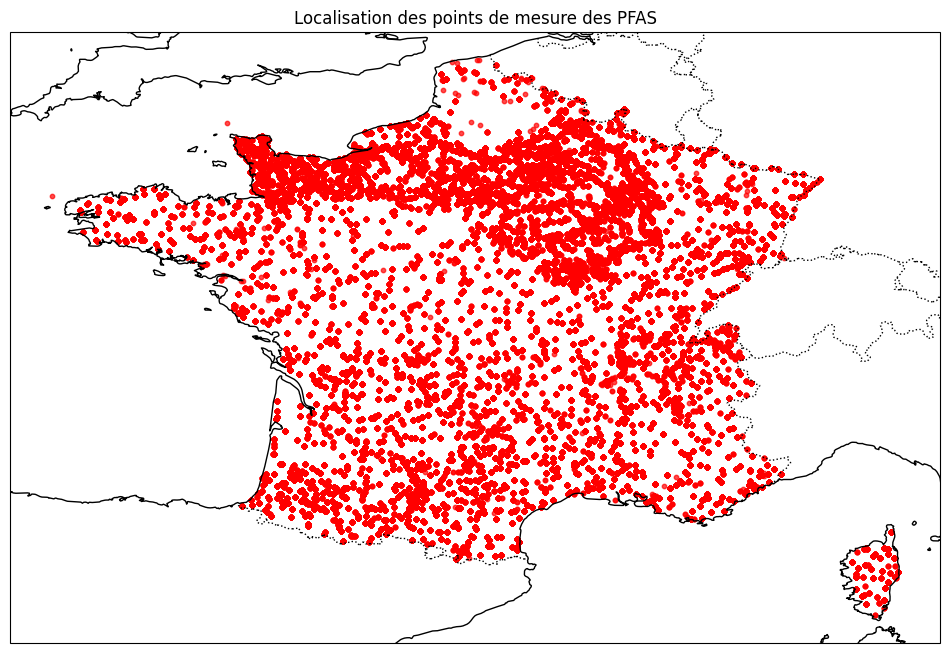

In [97]:
# Créer la figure et les axes avec la projection appropriée
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Ajouter des traits côtiers pour un meilleur contexte géographique
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Tracer les points de latitude et longitude
ax.scatter(df_num_surf_france['lon'], df_num_surf_france['lat'], color='red', s=10, alpha=0.7, transform=ccrs.PlateCarree())

# Ajouter des labels et un titre
ax.set_title('Localisation des points de mesure des PFAS')
plt.show()

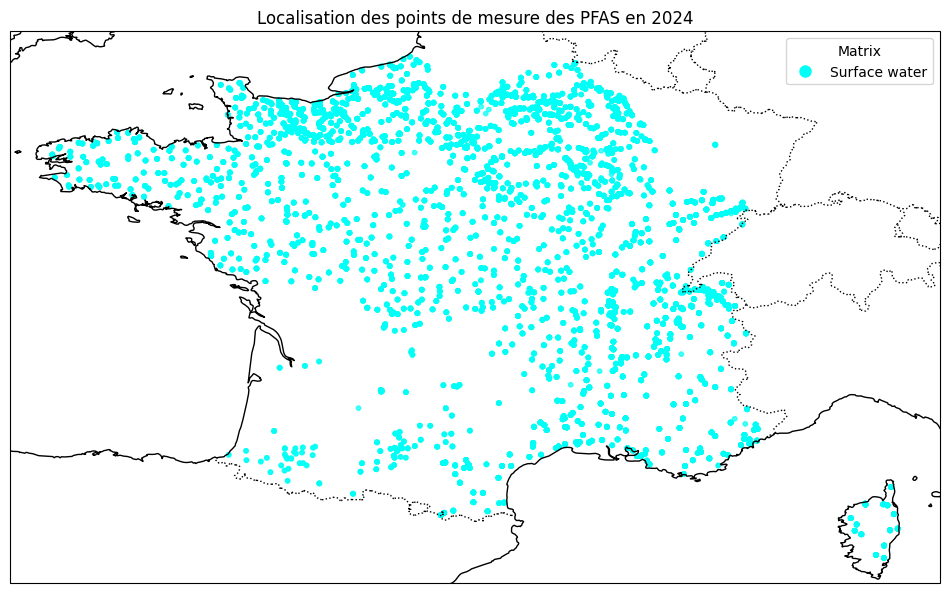

In [98]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns

# Filtrer le dataset pour l'année 2024
df_2024 = df_num_surf_france[df_num_surf_france['year'] == 2023]

# Créer la figure et les axes avec la projection appropriée
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Ajouter des traits côtiers pour un meilleur contexte géographique
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Mapper les catégories de 'matrix' à des couleurs spécifiques
unique_labels = df_2024['matrix'].unique()  # Extraire les labels uniques
palette = sns.color_palette('hsv', len(unique_labels))  # Créer une palette de couleurs avec suffisamment de couleurs

# Créer un dictionnaire pour mapper chaque label à une couleur
color_map = {label: color for label, color in zip(unique_labels, palette)}

# Appliquer les couleurs au scatter plot en fonction du label 'matrix'
colors = df_2024['matrix'].map(color_map)  # Mapper les labels aux couleurs

# Tracer les points de latitude et longitude avec la couleur correspondant à la catégorie 'matrix'
scatter = ax.scatter(df_2024['lon'], df_2024['lat'], color=colors, s=10, alpha=0.7, transform=ccrs.PlateCarree())

# Ajouter une légende manuelle avec les labels 'matrix'
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10)
                   for label, color in color_map.items()]
ax.legend(handles=legend_elements, title="Matrix")

# Ajouter un titre
ax.set_title('Localisation des points de mesure des PFAS en 2024')

plt.show()


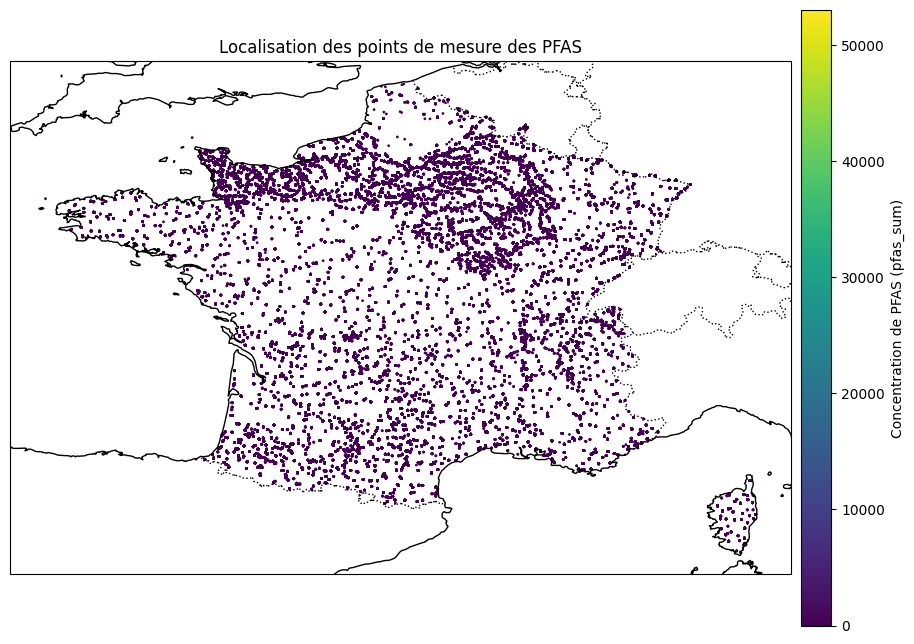

In [99]:
# Créer la figure et les axes avec la projection appropriée
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Ajouter des traits côtiers et des frontières pour un meilleur contexte géographique
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Définir les valeurs de sum_pfas pour colorer les points
values = df_num_surf_france['pfas_sum']

# Tracer les points de latitude et longitude avec une coloration selon sum_pfas
scatter = ax.scatter(df_num_surf_france['lon'], df_num_surf_france['lat'],
                     c=values, cmap='viridis', s=1, alpha=1, transform=ccrs.PlateCarree())

# Ajouter une barre de couleur pour indiquer les valeurs de concentration des PFAS
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.01)
cbar.set_label('Concentration de PFAS (pfas_sum)')

# Ajouter des labels et un titre
ax.set_title('Localisation des points de mesure des PFAS')
plt.show()

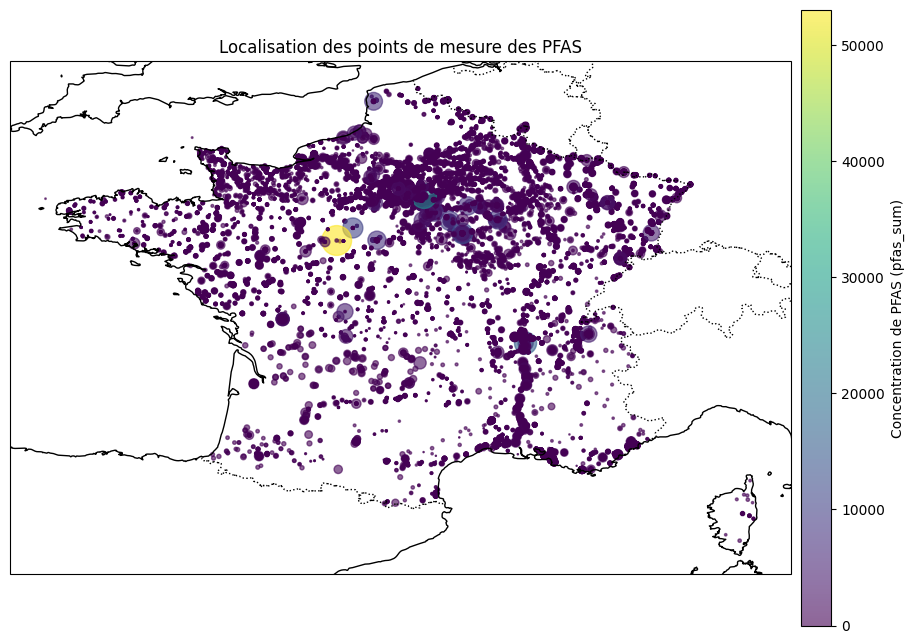

In [100]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Créer la figure et les axes avec la projection appropriée
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Ajouter des traits côtiers et des frontières pour un meilleur contexte géographique
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Définir les valeurs de pfas_sum pour la couleur et la taille des points
values = df_num_surf_france['pfas_sum']

# Définir une échelle de taille en fonction de pfas_sum
# On utilise une transformation (racine carrée) pour éviter que les points ne deviennent trop grands
sizes = 2 * np.sqrt(values)  # Ajuster le coefficient (ici 20) pour changer l'échelle globale des tailles

# Tracer les points de latitude et longitude avec une coloration et une taille dépendant de pfas_sum
scatter = ax.scatter(df_num_surf_france['lon'], df_num_surf_france['lat'],
                     c=values, cmap='viridis', s=sizes, alpha=0.6, transform=ccrs.PlateCarree())

# Ajouter une barre de couleur pour indiquer les valeurs de concentration des PFAS
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.01)
cbar.set_label('Concentration de PFAS (pfas_sum)')

# Ajouter des labels et un titre
ax.set_title('Localisation des points de mesure des PFAS')

# Afficher la figure
plt.show()


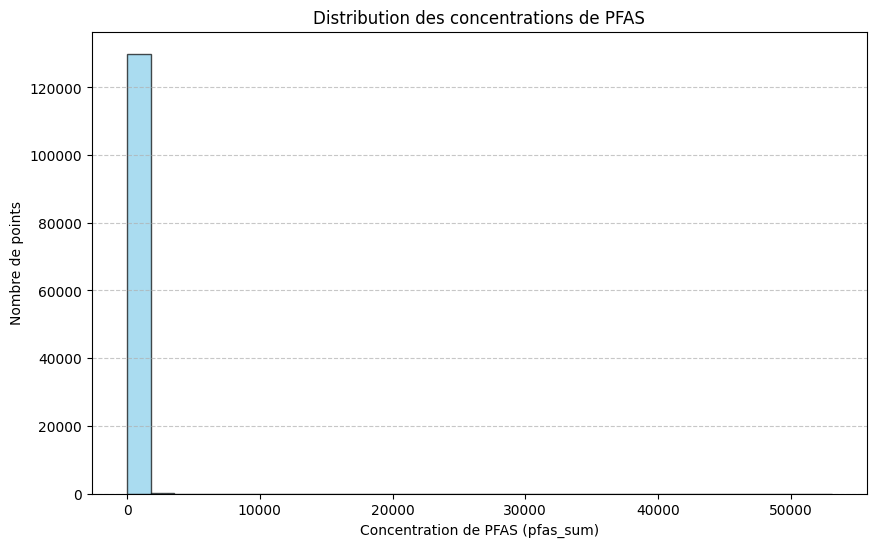

In [101]:

# Définir les valeurs de pfas_sum à partir du DataFrame
values = df_num_surf_france['pfas_sum']

# Créer l'histogramme avec 10 classes (bins)
plt.figure(figsize=(10, 6))
plt.hist(values, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Ajouter des labels et un titre
plt.xlabel('Concentration de PFAS (pfas_sum)')
plt.ylabel('Nombre de points')
plt.title('Distribution des concentrations de PFAS')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Afficher l'histogramme
plt.show()

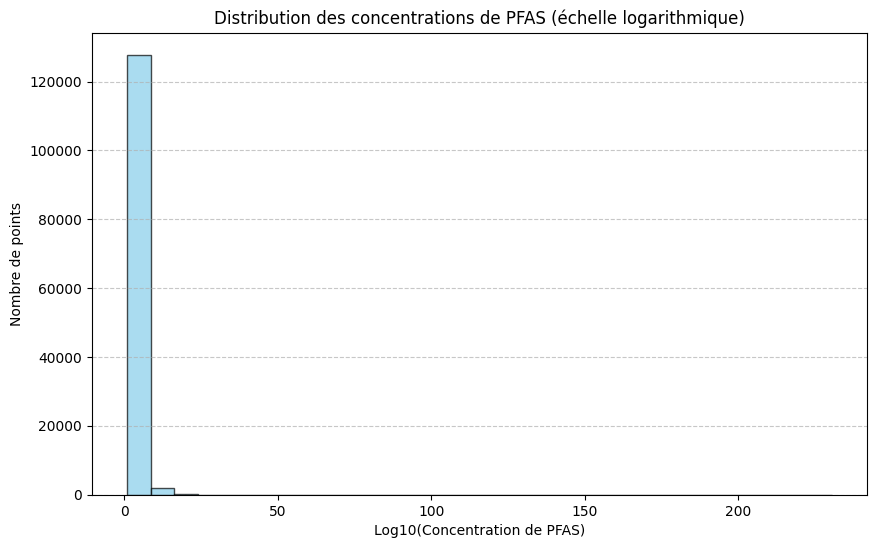

In [102]:
import numpy as np

df_num_surf_france['pfas_sum_log'] = df_num_surf_france['pfas_sum'].apply(lambda x: np.sqrt(x+1))

# Appliquer une transformation logarithmique sur les valeurs
log_values = df_num_surf_france['pfas_sum_log']

# Créer l'histogramme avec une échelle logarithmique
plt.figure(figsize=(10, 6))
plt.hist(log_values, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Ajouter des labels et un titre
plt.xlabel('Log10(Concentration de PFAS)')
plt.ylabel('Nombre de points')
plt.title('Distribution des concentrations de PFAS (échelle logarithmique)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Afficher l'histogramme
plt.show()


In [103]:
df_num_surf_france[df_num_surf_france['year'] == 1700]

,category,lat,lon,country,dataset_id,pfas_values,unit,pfas_sum,matrix,date,year,pfas_sum_log


In [118]:
data_france_2024["matrix"].value_counts()

matrix
Surface water    129473
Name: count, dtype: int64

(2454, 13)


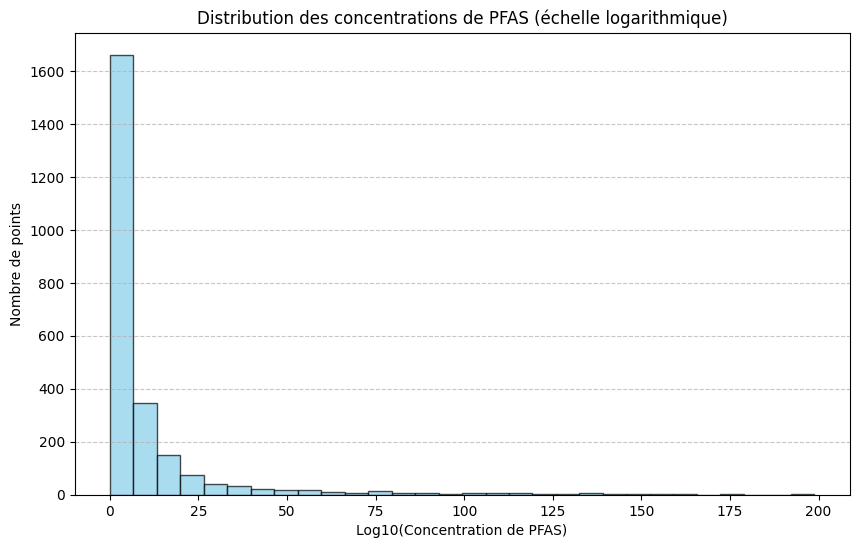

In [120]:
import numpy as np
data_france_2024 = df_num_surf_france[df_num_surf_france['pfas_sum'] <200]
data_france_2024 = data_france_2024[data_france_2024['year'] ==2024]

data_france_2024['pfas_sum_logexp'] = data_france_2024['pfas_sum'].apply(lambda x: np.log(x+1))
print(data_france_2024.shape)
# Appliquer une transformation logarithmique sur les valeurs
log_values = data_france_2024['pfas_sum']

# Créer l'histogramme avec une échelle logarithmique
plt.figure(figsize=(10, 6))
plt.hist(log_values, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Ajouter des labels et un titre
plt.xlabel('Log10(Concentration de PFAS)')
plt.ylabel('Nombre de points')
plt.title('Distribution des concentrations de PFAS (échelle logarithmique)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Afficher l'histogramme
plt.show()


In [105]:
data_france_2024.shape

(2470, 13)

In [106]:
import gstlearn as gl

db_france_2024 = gl.Db_fromPanda(data_france_2024)
db_france_2024.setLocators(["lon","lat"], gl.ELoc.X)
db_france_2024.setLocator("pfas_sum_logexp", gl.ELoc.Z)
db_france_2024


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 2
Number of Columns            = 7
Total number of samples      = 2470

Variables
---------
Column = 0 - Name = lat - Locator = x2
Column = 1 - Name = lon - Locator = x1
Column = 2 - Name = dataset_id - Locator = NA
Column = 3 - Name = pfas_sum - Locator = NA
Column = 4 - Name = year - Locator = NA
Column = 5 - Name = pfas_sum_log - Locator = NA
Column = 6 - Name = pfas_sum_logexp - Locator = z1

In [107]:
db_france_2024.getExtremas()

array([[-3.387624,  5.486501],
       [44.979035, 50.050076]])

In [108]:
grid = gl.DbGrid.create(x0=[-3,42],dx=[0.01, 0.01],nx=[1100,1000])

In [109]:
dbfmt = gl.DbStringFormat.createFromFlags(flag_extend=True)
grid.display(dbfmt)


Data Base Grid Characteristics

Data Base Summary
-----------------
File is organized as a regular grid
Space dimension              = 2
Number of Columns            = 3
Total number of samples      = 1100000

Grid characteristics:
---------------------
Origin :     -3.000    42.000
Mesh   :      0.010     0.010
Number :       1100      1000

Data Base Extension
-------------------
Coor #1 - Min =     -3.000 - Max =      7.990 - Ext = 10.99
Coor #2 - Min =     42.000 - Max =     51.990 - Ext = 9.99

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = x1 - Locator = x1
Column = 2 - Name = x2 - Locator = x2


In [110]:
varioParamMulti = gl.VarioParam.createMultiple(ndir=2, npas=100, dpas=0.1)
vario2dir = gl.Vario(varioParamMulti)
err = vario2dir.compute(db_france_2024)

In [111]:
fitmod = gl.Model()
types=[gl.ECov.NUGGET, gl.ECov.EXPONENTIAL, gl.ECov.GAUSSIAN]
err = fitmod.fit(vario2dir,types=types)

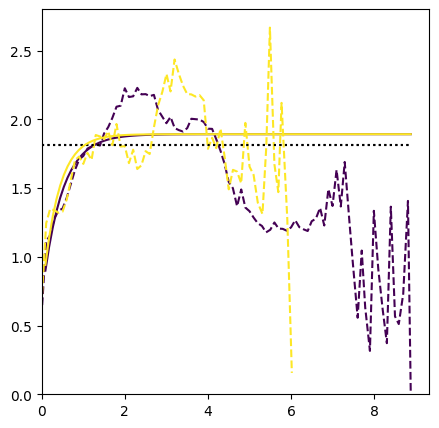

In [112]:
ax = gp.varmod(vario2dir, fitmod)

In [113]:
uniqueNeigh = gl.NeighUnique.create()

#### Essayer cokrigeage avec un dataset avec uniquement les points qui ont des valeurs avec log10 puis un autre dataset avec des donneés où on sait qu'il y a rien (cela permet de garder l'information des données valant 0)  (voir avec chatgpt)